In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,chisquare,chi2_contingency
%matplotlib inline

Follow all Data Exploration steps learnt in training.

In [2]:
#Loading the dataset
df1= pd.read_csv(r"C:\Users\Dell\Desktop\Internshala_Project\train.csv")
df1.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [3]:
df2 = pd.read_csv(r"C:\Users\Dell\Desktop\Internshala_Project\test.csv")
df2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


Let's Identify the dependent(target) and independent variables by observing given features in dataset.

In [4]:
df1.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')

In [5]:
df2.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

We can say that Target variable is "target" as it is not presnt in test data and also by observing question we can say.

In [7]:
df1.shape 

(79853, 13)

Here we can observe that 12 features are independent variables and 1 is target varaible i.e "target"

# Identification of Categorical and Continuous Variables

In [9]:
df1.dtypes
#identify categorical and continuous variables

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
target                                int64
dtype: object

Here pandas store categorical variables as objects and continuous variables as int,float..By this we can identify categorical and continuous varible.We can observe our target variable is of type continuous.

# Implementation of Univariate Analysis for Continuous variables Variables

In [11]:
#using the  describe function on continuous variables
df1.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


(array([ 4998.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 74855.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

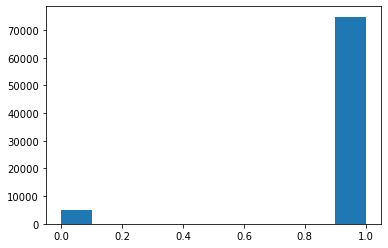

In [12]:
#plotting histogram chart for age variable
#df["Age"].plot.hist()
plt.hist(df1["target"])

<AxesSubplot:>

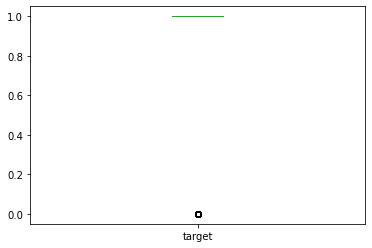

In [14]:
#plotting box plot for age varaible
df1["target"].plot.box()

<AxesSubplot:>

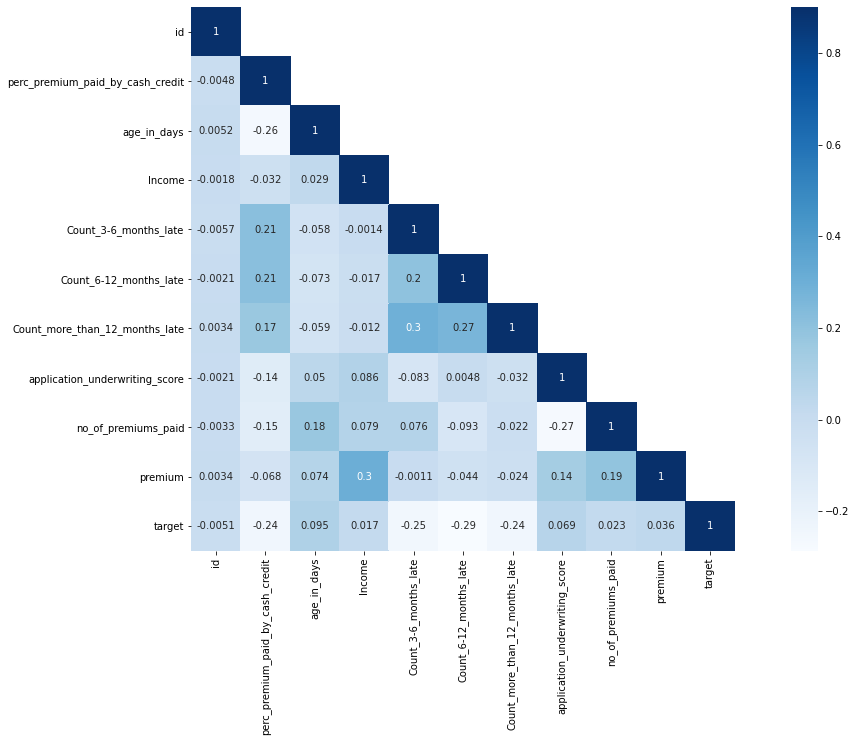

In [15]:
corr = df1.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="Blues")

In [18]:
#No w find correaltion between these to know relation
df1.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,0.003430,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.067523,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.074070,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.302825,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.001086,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.043794,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.023615,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.135078,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.191889,0.022664
premium,0.003430,-0.067523,0.074070,0.302825,-0.001086,-0.043794,-0.023615,0.135078,0.191889,1.000000,0.036416


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

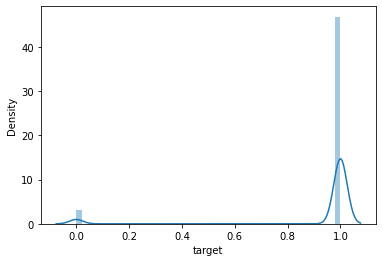

In [20]:
# distribution of count variable
sn.distplot(df1["target"])

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_in_days', ylabel='Density'>

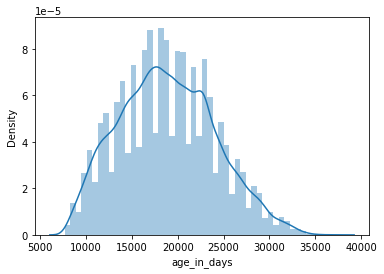

In [21]:
sn.distplot(df1["age_in_days"])

Next we will look for any missing values in the dataset.

# Implementation Of Treating Missing Values

In [22]:
df1.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

We can see there are  missing values in the train dataset.fill the missing values with 0

In [24]:
df1.fillna(0,inplace=True)

In [25]:
df1.isnull().sum()
#now we can see there are no missing values.

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
target                              0
dtype: int64

Do similar process for test data set

In [26]:
df2.isnull().sum()
#fill all missing values with 0

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [28]:
df2.fillna(0,inplace=True)

In [29]:
df2.isnull().sum()
#There are no missing values

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

Now, we will start to build our predictive model to predict whether a policy holder(customer) pay a premium on time  or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

In [60]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [61]:
#Here target variable is target and it is continuous so it is regression problem
#Lets take age_in_days<=28000 for training and age_in_days >=28000 for validation
#Training data should have dependent and independent variable
#While test data should not contain dependent variable.

In [ ]:
df1=df1.drop('sourcing_channel',1)

In [72]:
X_train =df1[df1['age_in_days']<=28000]
validation = df1[df1['age_in_days']>28000]

In [73]:
X_train = df1.drop('target',1)
y_train = df1['target']
X_val = validation.drop('target',1)
y_val = validation['target']

In [74]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((79853, 11), (79853,), (3927, 11), (3927,))

In [75]:
X_train=pd.get_dummies(X_train)
X_val=pd.get_dummies(X_val)

In [76]:
# fitting the model on X_train and y_train
lreg.fit(X_train,y_train)

LinearRegression()

In [77]:
# making prediction on validation set
prediction = lreg.predict(X_val)

In [78]:
df1.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,Urban,9600,1


In [79]:
prediction.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((3927,), (79853, 12), (79853,), (3927, 12), (3927,))

In [81]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [82]:
rmsle(y_val,prediction)

0.09656506126205568

In [84]:
#R^2 value for test data set
lreg.score(X_train,y_train)

0.1553262730203152

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
clf = DecisionTreeRegressor(max_depth=7)

In [91]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [103]:
predict = clf.predict(X_val)

In [104]:
# calculating rmsle of the predicted values
rmsle(y_val, predict)

0.09210059948523892

In [ ]:
df2=df2.drop('sourcing_channel',1)

In [ ]:
test_prediction = clf.predict(df2)

In [107]:
df2=pd.get_dummies(df2)

In [108]:
p1 = pd.DataFrame()

In [ ]:
# creating a count column and saving the predictions in it
p1['target'] = test_prediction

In [111]:
p1.to_csv('p1.csv', header=True, index=False)

In [112]:
clf.score(X_train, y_train)

0.19699716442472082